# Iteration 1
Step by step

-0.3220100302510966


Text(0, 0.5, 'slopes')

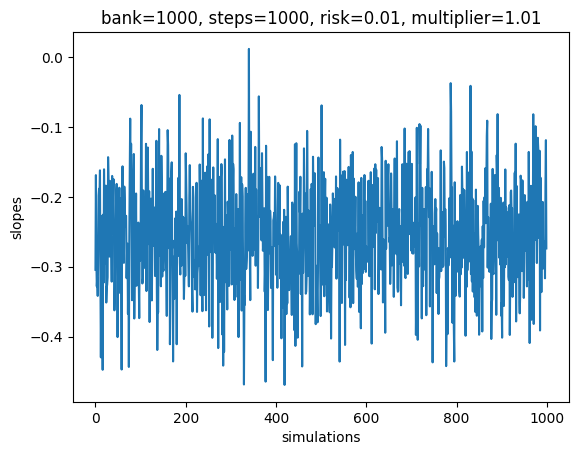

In [69]:
# %%time
import numpy as np
import matplotlib.pyplot as plt
import random
from tqdm import tqdm
"""
f = lambda x: 0.990/x
"""

BANK = 1000
STEPS = 100
RISK = 0.01 # 1% Risk
MULTIPLIER = 1.01 

def sim(bank=1000, steps=1000, risk=0.01, multiplier=1.01):
    rng = np.random.default_rng()
    prob = 0.99 / multiplier
    
    b = bank
    y = np.zeros(steps)
    x = np.arange(0,steps)
    
    for i in range(steps):
        
        bet = bank * risk
        bank -= bet
        if rng.random() < prob:
            bank += bet * multiplier

        else:
            bank -= bet
        y[i] = bank
    m,b = np.polyfit(x,y, 1)
    return m

print(sim())
# Slope of one simulated run with the given presets 

ITERS = 1000
y = np.zeros(ITERS)
x = np.arange(0,ITERS)
for i in range(ITERS):
    y[i] = sim()

plt.plot(y)
plt.title("bank=1000, steps=1000, risk=0.01, multiplier=1.01")
plt.xlabel("simulations")
plt.ylabel("slopes")


# Iteration 2 
building off iteration 1

100%|██████████| 100/100 [00:05<00:00, 19.63it/s]


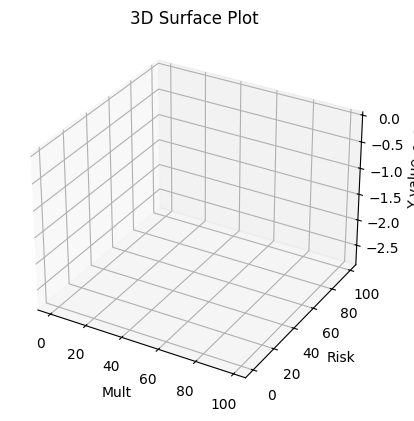

In [90]:
# %%time
import numpy as np
import matplotlib.pyplot as plt
import random
from tqdm import tqdm
from mpl_toolkits.mplot3d import Axes3D  # needed for 3d plots
"""
f = lambda x: 0.990/x
"""

def sim(bank=1000, steps=1000, risk=0.01, multiplier=1.01):
    rng = np.random.default_rng()
    prob = 0.99 / multiplier
    
    b = bank
    y = np.zeros(steps)
    x = np.arange(0,steps)
    
    for i in range(steps):
        
        bet = bank * risk
        bank -= bet
        if rng.random() < prob:
            bank += bet * multiplier

        else:
            bank -= bet
        y[i] = bank
    m,b = np.polyfit(x,y, 1)
    return m


BANK = 1000
STEPS = 100
RISKS = np.linspace(0.01, 1, num=100) # 1% Risk
MULTIPLIERS = np.linspace(1.01,100,num=100)
SIM_AMT = 100

    
def gain(risk,mult, amt=1000,bank=1000):
    # slope(slope(amt * sim(risk,mult)))

    y = np.zeros(amt)
    for i in range(amt):
        y[i] = sim(bank=bank,steps=amt,risk=risk,multiplier=mult)
    
    m = y.sum()

    return m

x = np.arange(0,SIM_AMT)
z = np.arange(0,SIM_AMT)
y = np.zeros((SIM_AMT,SIM_AMT))

for i in tqdm(range(len(MULTIPLIERS))):
    for j in range(len(RISKS)):
        y[i,j] = sim(risk=RISKS[j],multiplier=MULTIPLIERS[i])



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x, z, y, cmap='viridis')

ax.set_xlabel('X axis')
ax.set_ylabel('Z axis')
ax.set_zlabel('Y value')

plt.title('3D Surface Plot')
plt.xlabel("Mult")
plt.ylabel("Risk")

plt.show()

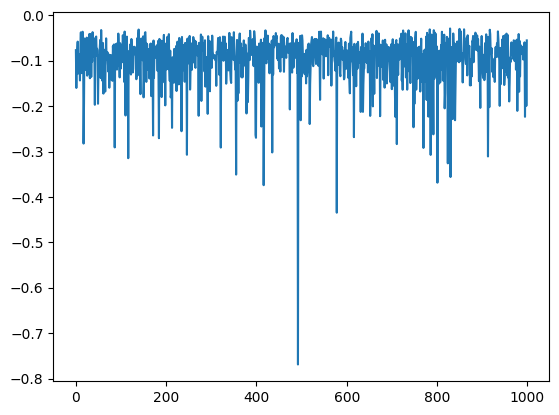

In [89]:
arr = []
for i in range(1000):
    arr.append(sim(risk=0.1,multiplier=2.2))

plt.plot(arr)